In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as sp

In [2]:
t=np.loadtxt('LF_Blanton2001.csv',delimiter=',')

In [3]:
Mdata=t[:,0]
Ldata=t[:,1]

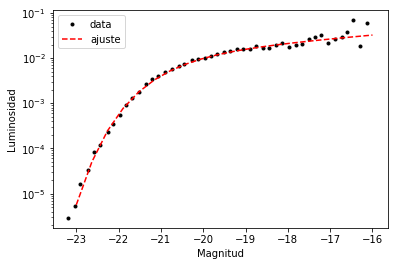

In [4]:
plt.plot(Mdata,Ldata,linestyle='none',marker='.',color='black',label='data')
plt.semilogy()
plt.xlabel('Magnitud')
plt.ylabel('Luminosidad')


fi=[]
#MODELO
fi0_posta=1.46e-2            #EL TEORICO DICE 1.46
M0_posta=-20.83
alfa_posta=-1.2

M = np.linspace(-23,-16,20)
model=0.4*np.log(10)*(fi0_posta)*(10**(-0.4*(M-M0_posta)*(alfa_posta+1)))*np.exp(-10**(-0.4*(M-M0_posta)))

    
plt.plot(M,model,label='ajuste',color='red',linestyle='--')
plt.legend()

In [5]:
import numpy as np
import scipy as sp
import pandas as pd
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import functools

import plotly
import plotly.graph_objs as go
import string
import numpy as np
import random

from scipy.stats import norm
from __future__ import print_function

In [6]:
def MODEL(fi0,M0,alpha,M):
    fi=0.4*np.log(10)*(fi0)*(10**(-0.4*(M-M0)*(alpha+1)))*np.exp(-10**(-0.4*(M-M0)))
    return(fi)

In [7]:
def loglikelihood(M,L,fi0,M0,alpha):
    modely = MODEL(fi0,M0,alpha,M)
    residuos = L - modely
    ll=-np.sum((residuos**2)/(2*(L*.1)**2))
    return(ll)

In [8]:
loglikelihood(Mdata,Ldata,1.46e-2,-22.,-1.)

-5043722.826472479

In [9]:
xmin=1e-2
xmax=2e-2
ymin=-30.
ymax=-18.
zmin=-3.
zmax=1.5
def PRIOR2(x,y,z):
    #st=np.log(0)
    if (x<xmax and x>xmin and y<ymax and y >ymin and z>zmin and z<zmax):
        st=np.log(1)
    else :
            st=np.log(0)
    return(st)   

In [10]:
def POSTERIOR2(M,L,fi0,M0,alpha):
    #s=loglikelihood(M,L,fi0,M0,alpha)+PRIOR2(f90,M0,alpha)
    #print (s)
    #posterior = 2.71**s
    #print (posterior)
    posterior = np.exp(loglikelihood(M,L,fi0,M0,alpha) + PRIOR2( fi0,M0, alpha))
    return(posterior)

In [11]:
#def POSTERIOR2(M,L,M0,alpha):
 #   posterior = np.exp(log)

In [12]:
POSTERIOR2(Mdata, Ldata, 1.46e-2, -20., -1.5)

0.0

In [13]:
saltitofi0=5e-4
saltitoM0=.1
saltitoalpha=.05

def PROPOSAL3(fi0,M0,alpha):
    fi0_sig=np.random.uniform(-1,1)*saltitofi0
    M0_sig=np.random.uniform(-1,1)*saltitoM0
    alpha_sig=np.random.uniform(-1,1)*saltitoalpha
    return (fi0+fi0_sig,M0 + M0_sig, alpha + alpha_sig)

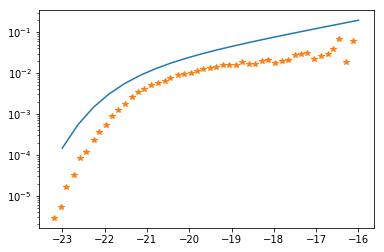

In [14]:
fi0_first = 1.7e-2 # Valor inicial para a0
M0_first = -21.5 # Valor inicial para t0
alpha_first = -1.5

# veamos si estamos cerca:
modelx = np.linspace(-23,-16,20)
modely = MODEL(fi0_first,M0_first, alpha_first, modelx)
plt.plot(modelx,modely, "-")
plt.plot(Mdata,Ldata, "*")
plt.semilogy()
plt.show()

In [15]:
Nsteps = 10000 # Nro. de pasos
par_fi0=[]; par_M0 = []; par_alpha = []

fi0_actual = fi0_first
M0_actual = M0_first
alpha_actual = alpha_first
post_actual = POSTERIOR2(Mdata, Ldata, fi0_actual, M0_actual, alpha_actual)

par_fi0.append(fi0_actual)
par_M0.append(M0_actual)
par_alpha.append(alpha_actual)
#
#print(M0)
#print(PRIOR2(M0_actual, alpha_actual))
#print(loglikelihood(Mdata,Ldata,M0_actual,alpha_actual))
print (post_actual)
post_list=[]

no_accept=0

0.0


In [ ]:
fi0_like = []
M0_like = []
alpha_like = []



In [16]:
for _ in range(Nsteps):
    
    
    fi0_candid, M0_candid, alpha_candid = PROPOSAL3(fi0_actual,M0_actual, alpha_actual)    
    post_candid = POSTERIOR2(Mdata, Ldata, fi0_candid, M0_candid, alpha_candid)
    
    #print ('%.5e'%post_candid)
    
    
    p_candid=post_candid/post_actual
    
    p_accept = min(1., p_candid)
    accept = np.random.rand() < p_accept
    if accept:
        # Update position
        fi0_actual = fi0_candid
        M0_actual = M0_candid
        alpha_actual = alpha_candid
        post_actual = post_candid
        
        par_fi0.append(fi0_actual)
        par_M0.append(M0_actual)
        par_alpha.append(alpha_actual)
        post_list.append(post_candid)
        
        
    else : 
        no_accept=no_accept+1


par_fi0=np.array(par_fi0)
par_M0=np.array(par_M0)
par_alpha=np.array(par_alpha)
i=np.where(post_list==np.max(post_list))[0]

fi0_est=par_fi0[i]
M0_est= par_M0[i]
alpha_est = par_alpha[i]
#print (post_list)

/home/agustin/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning:

invalid value encountered in double_scalars

/home/agustin/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning:

divide by zero encountered in log

/home/agustin/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning:

divide by zero encountered in double_scalars



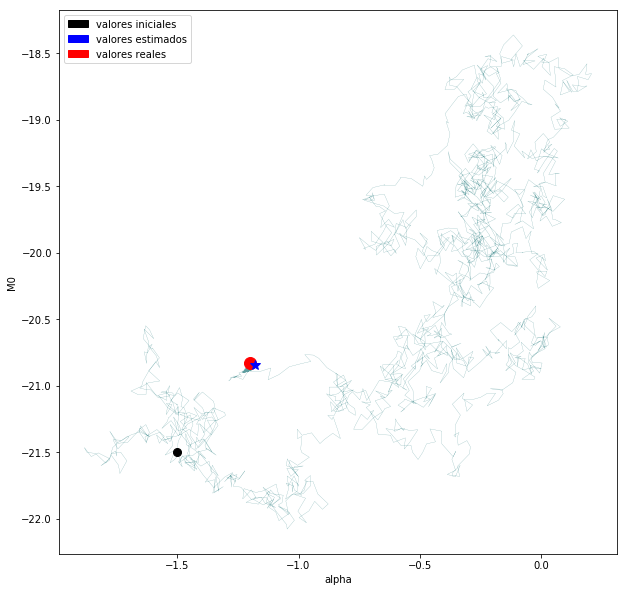

In [17]:
plt.figure(figsize=(10,10))
plt.plot(par_alpha, par_M0, marker='.',markersize=0., lw = 0.2, color='cadetblue')

plt.plot(alpha_first, M0_first, marker='o', markersize=8, color='k')
plt.plot(alfa_posta, M0_posta, marker='o', markersize=12, color='r')
plt.plot(alpha_est, M0_est, marker='*', markersize=10, color='b')
plt.xlabel('alpha')
plt.ylabel('M0')
init = mpatches.Patch(color='k', label='valores iniciales')
real = mpatches.Patch(color='r', label='valores reales')
esti = mpatches.Patch(color='b', label='valores estimados')
plt.legend(handles=[init, esti, real])


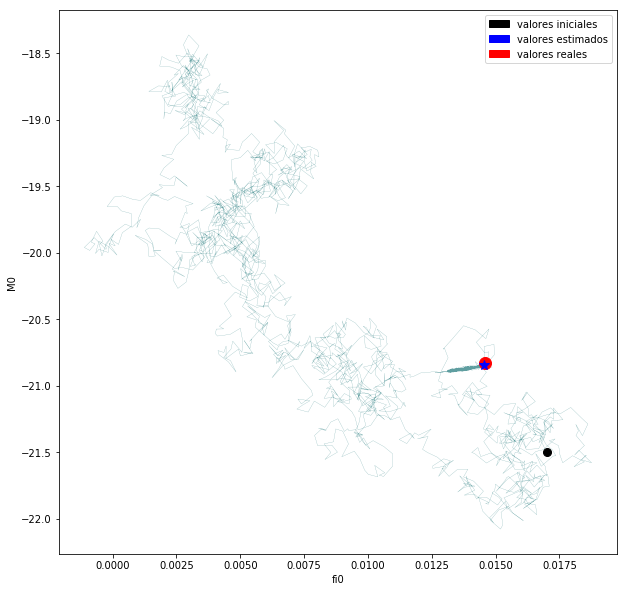

In [18]:
plt.figure(figsize=(10,10))
plt.plot(par_fi0, par_M0, marker='.',markersize=0., lw = 0.2, color='cadetblue')
plt.plot(fi0_first, M0_first, marker='o', markersize=8, color='k')
plt.plot(fi0_posta, M0_posta, marker='o', markersize=12, color='r')
plt.plot(fi0_est, M0_est, marker='*', markersize=10, color='b')
plt.xlabel('fi0')
plt.ylabel('M0')
init = mpatches.Patch(color='k', label='valores iniciales')
real = mpatches.Patch(color='r', label='valores reales')
esti = mpatches.Patch(color='b', label='valores estimados')
plt.legend(handles=[init, esti, real])

In [111]:
len(par_M0) + no_accept


701

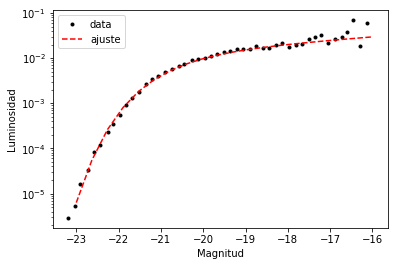

In [19]:
plt.plot(Mdata,Ldata,linestyle='none',marker='.',color='black',label='data')
plt.semilogy()
plt.xlabel('Magnitud')
plt.ylabel('Luminosidad')


fi=[]
#MODELO
Fi0=1.46e-2            
M0=M0_est
alfa=alpha_est

M = np.linspace(-23,-16,20)
model=0.4*np.log(10)*(Fi0)*(10**(-0.4*(M-M0)*(alfa+1)))*np.exp(-10**(-0.4*(M-M0)))

    
plt.plot(M,model,label='ajuste',color='red',linestyle='--')
plt.legend()

In [21]:
#LIKELIHOOD v PARAMETROS

In [29]:
par_fi0[:2013]

array([0.017     , 0.01679357, 0.01673467, ..., 0.01372605, 0.01325184,
       0.01311073])

(-21.0, -20.78)

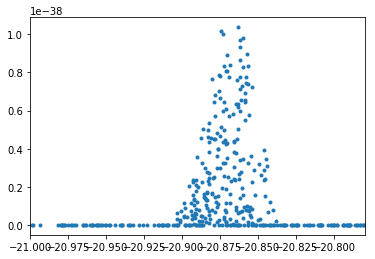

In [47]:
plt.plot(par_M0[1:],post_list,linestyle='none',marker='.')
plt.xlim(-21.,-20.78)

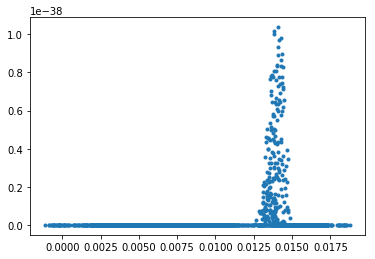

In [41]:
plt.plot(par_fi0[1:],post_list,linestyle='none',marker='.')

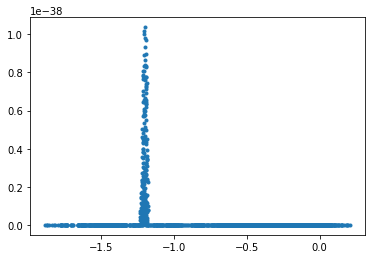

In [48]:
plt.plot(par_alpha[1:],post_list,linestyle='none',marker='.')